In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import networkx as nx
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

%matplotlib inline

In [370]:
# read the data file

df = pd.ExcelFile('dataset.xlsx').parse('All'); 
dfcpy = df.copy()
dfcpy = dfcpy[['SARS-Cov-2 exam result',
               'Hematocrit',
               'Hemoglobin',
               'Leukocytes', 
               'Lymphocytes', 
               'Neutrophils', 
               'Basophils', 
               'Monocytes',
               'Urea', 
               'Potassium', 
               'Sodium'          
              ]]
dfcpy.shape

(5644, 11)

In [371]:
dfcpy = dfcpy.dropna()
dfcpy.shape

(290, 11)

In [372]:

dfcpy.describe()

,Hematocrit,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Monocytes,Urea,Potassium,Sodium
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,0.005577,-0.011969,-0.152953,0.012996,0.009374,0.108025,0.149615,-0.015205,-0.036467,0.012392
std,1.025490,1.012956,0.828697,0.947085,1.016854,0.802123,0.979502,0.801061,0.949789,0.954642
min,-3.608765,-3.593731,-1.928470,-1.830953,-2.626823,-1.140144,-2.084932,-1.630410,-2.283079,-5.246946
25%,-0.518807,-0.633236,-0.717956,-0.634755,-0.688742,-0.529226,-0.456613,-0.513909,-0.800110,-0.575008
50%,0.030518,0.040316,-0.322799,-0.005738,-0.045447,0.081693,-0.088928,-0.141742,-0.058626,0.143752
75%,0.780119,0.713868,0.305416,0.580634,0.679797,0.692611,0.587350,0.453725,0.682859,0.503132
max,2.662704,2.671868,2.949764,3.218241,2.535929,3.136283,4.533397,4.473129,3.401635,3.737550


In [373]:
df_positive = dfcpy[dfcpy['SARS-Cov-2 exam result'] == 'positive']
df_positive = df_positive[['Hematocrit','Hemoglobin','Leukocytes', 
               'Lymphocytes', 'Neutrophils', 'Basophils', 'Monocytes',
               'Urea', 'Potassium', 'Sodium'
                ]]
df_positive = df_positive.dropna()
df_positive.head()

,Hematocrit,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Monocytes,Urea,Potassium,Sodium
568,0.991838,0.792188,-0.420197,-0.048383,-0.414215,1.303529,1.933339,-0.513909,-0.058626,0.143752
884,-0.495919,-0.398276,-0.820919,-0.935404,1.282118,-1.140144,-0.456613,0.974759,-1.047272,0.862512
1108,-0.312811,-0.648900,-0.968407,-0.099557,-0.315877,-0.529226,1.513128,0.304858,0.682859,1.940651
1162,-0.518807,-0.272964,-0.573250,-0.457777,-0.127395,-0.223767,2.537393,-0.588343,-0.800110,-0.575008
1494,-0.015259,-0.147652,-1.335736,1.614780,-1.782754,-0.223767,0.725232,-0.886076,-0.305787,0.143752


In [374]:
df_negative = dfcpy[dfcpy['SARS-Cov-2 exam result'] == 'negative']
df_negative = df_negative[['Hematocrit','Hemoglobin','Leukocytes', 
               'Lymphocytes', 'Neutrophils', 'Basophils', 'Monocytes',
               'Urea', 'Potassium', 'Sodium'
                ]]
df_negative = df_negative.dropna()
df_negative.head()

,Hematocrit,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Monocytes,Urea,Potassium,Sodium
1,0.236515,-0.022340,-0.094610,0.318366,-0.619086,-0.223767,0.357547,1.198059,-0.305787,0.862512
8,-1.571682,-0.774212,0.364550,-0.005738,-0.127395,-0.223767,0.068652,-0.067309,0.930020,0.503132
15,-0.747693,-0.586244,-0.884923,-1.114514,0.880570,0.081693,1.276759,-0.811643,0.435697,-0.215628
22,0.190738,-0.147652,-1.132592,0.002791,-0.422410,0.387152,2.012129,-1.332677,-0.552949,-0.575008
30,-0.679027,-0.711556,-0.286623,-0.875701,0.782232,-0.223767,0.804021,-0.439476,0.435697,-1.653147


In [375]:
#standardization
scaler = StandardScaler()
std_data = scaler.fit_transform(df_negative.values)
std_df_negative = pd.DataFrame(std_data, index=df_negative.index, columns=df_negative.columns)
std_df_negative.head()

,Hematocrit,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Monocytes,Urea,Potassium,Sodium
1,0.264947,0.041503,-0.097060,0.339118,-0.633777,-0.462848,0.324295,1.437671,-0.331186,0.852548
8,-1.441215,-0.679899,0.463017,0.001302,-0.157622,-0.462848,0.016841,-0.095870,0.945483,0.477301
15,-0.663723,-0.499548,-1.061070,-1.154386,0.818495,-0.091638,1.302560,-0.997953,0.434815,-0.273192
22,0.221753,-0.078731,-1.363172,0.010192,-0.443316,0.279573,2.085172,-1.629411,-0.586520,-0.648439
30,-0.598932,-0.619782,-0.331274,-0.905469,0.723264,-0.462848,0.799452,-0.546911,0.434815,-1.774179


In [376]:
#standardization
scaler = StandardScaler()
std_data_pos= scaler.fit_transform(df_positive.values)
std_df_positive = pd.DataFrame(std_data_pos, index=df_positive.index, columns=df_positive.columns)
std_df_positive.head()

,Hematocrit,Hemoglobin,Leukocytes,Lymphocytes,Neutrophils,Basophils,Monocytes,Urea,Potassium,Sodium
568,0.948633,0.687139,0.781905,-0.177987,-0.328427,2.230052,1.298386,-0.570021,0.270340,0.316021
884,-0.926572,-0.792500,-0.044683,-1.196374,1.517797,-1.592895,-1.034486,1.710062,-0.955201,1.102220
1108,-0.695777,-1.104004,-0.348914,-0.236740,-0.221400,-0.637158,0.888211,0.684025,1.189495,2.281518
1162,-0.955421,-0.636749,0.466194,-0.648012,-0.016264,-0.159289,1.888013,-0.684025,-0.648815,-0.470178
1494,-0.320737,-0.480997,-1.106620,1.731488,-1.817894,-0.159289,0.119132,-1.140041,-0.036045,0.316021


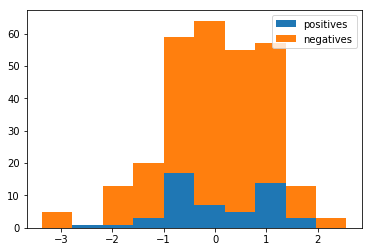

In [377]:
#Hematocrit
positives = std_df_positive['Hematocrit']
negatives = std_df_negative['Hematocrit']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

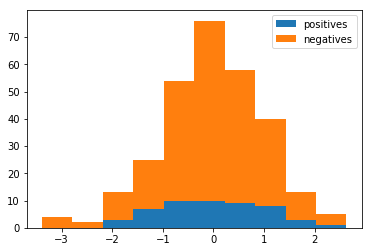

In [378]:
#Hemoglobin
positives = std_df_positive['Hemoglobin']
negatives = std_df_negative['Hemoglobin']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

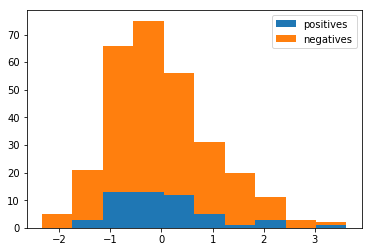

In [379]:
#Leukocytes
positives = std_df_positive['Leukocytes']
negatives = std_df_negative['Leukocytes']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

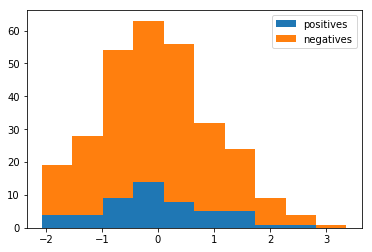

In [380]:
#Lymphocytes
positives = std_df_positive['Lymphocytes']
negatives = std_df_negative['Lymphocytes']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

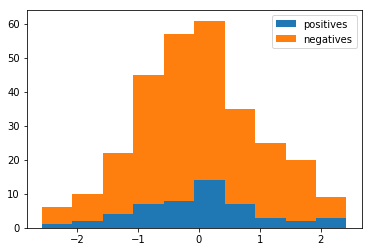

In [381]:
#Neutrophils
positives = std_df_positive['Neutrophils']
negatives = std_df_negative['Neutrophils']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

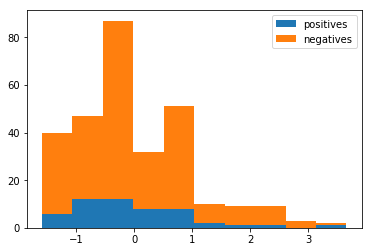

In [382]:
#Basophils
positives = std_df_positive['Basophils']
negatives = std_df_negative['Basophils']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

In [383]:
df_negative = df_negative[['Hemoglobin','Leukocytes', 
               'Lymphocytes', 'Neutrophils', 'Basophils', 'Monocytes',
               'Urea', 'Potassium', 'Sodium'
               #,  'Hb saturation (venous blood gas analysis)'
                ]]

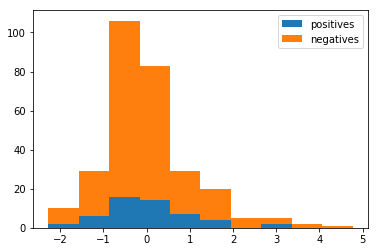

In [384]:
#Monocytes
positives = std_df_positive['Monocytes']
negatives = std_df_negative['Monocytes']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

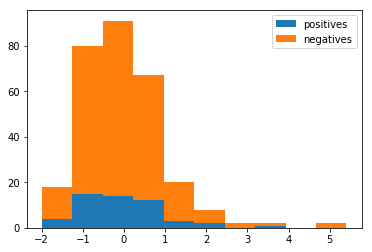

In [385]:
#Urea
positives = std_df_positive['Urea']
negatives = std_df_negative['Urea']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

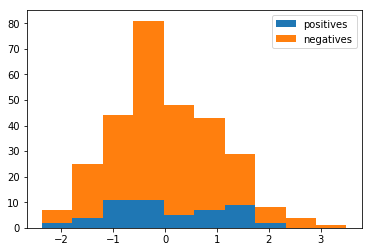

In [386]:
#Potassium
positives = std_df_positive['Potassium']
negatives = std_df_negative['Potassium']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

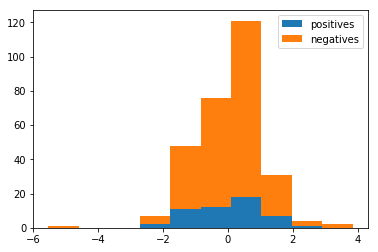

In [387]:
#Sodium
positives = std_df_positive['Sodium']
negatives = std_df_negative['Sodium']

plt.hist([positives, negatives], label=['positives', 'negatives'],stacked=True)
plt.legend(loc='upper right')
plt.show()

In [388]:
# CREATING A NETWORK BASED ON DISTANCES FOR THE SELECTED VARIBLES BELOW FOR EACH GROUP (POSITIVES AND NEGATIVES)
selected_variables = ['Hematocrit','Hemoglobin','Leukocytes','Lymphocytes','Neutrophils','Basophils','Monocytes','Urea','Potassium','Sodium']

positives = std_df_positive[selected_variables]
negatives = std_df_negative[selected_variables]


In [389]:
distance_matrix_positives = pd.DataFrame(
    squareform(pdist(positives, metric='euclidean')),
    columns = positives.index,
    index = positives.index
)

distance_matrix_negatives = pd.DataFrame(
    squareform(pdist(negatives, metric='euclidean')),
    columns = negatives.index,
    index = negatives.index
)

In [390]:
distance_matrix_negatives.describe()

,1,8,15,22,30,32,50,51,55,59,...,5410,5434,5437,5557,5581,5583,5602,5614,5615,5618
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,3.546551,3.622283,3.946862,4.301381,3.935569,3.761258,3.588660,3.537110,4.455855,3.882464,...,4.476637,4.175391,4.535579,4.148087,4.540673,6.567811,6.788986,4.438396,3.473477,6.975585
std,1.117152,1.003661,1.100228,1.208319,1.095963,1.325425,1.240835,1.294885,1.383681,1.319866,...,1.132430,0.924733,1.142229,1.101117,1.164621,1.439231,1.162395,1.162297,1.268626,1.116132
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.866322,2.975792,3.243847,3.491375,3.212023,2.928760,2.756262,2.749898,3.523634,3.007324,...,3.721394,3.620535,3.811221,3.460682,3.723071,5.608669,6.026864,3.711933,2.636946,6.254755
50%,3.357446,3.552461,3.854487,4.167796,3.861280,3.592755,3.384871,3.275572,4.332101,3.730209,...,4.408983,4.121369,4.534174,4.078970,4.557584,6.645669,6.794265,4.235522,3.192295,7.001977
75%,4.098547,4.137282,4.497605,4.876441,4.443053,4.464436,4.118051,4.091584,5.172206,4.450747,...,5.149653,4.685957,5.226111,4.821344,5.228208,7.510732,7.456652,5.047200,4.081484,7.692383
max,7.229017,7.659142,9.000893,10.210412,9.290271,9.499160,8.382970,9.547462,9.531674,8.918748,...,8.561060,8.168893,7.712285,8.375098,8.030326,10.272865,11.943899,8.671897,9.504102,9.984235


In [391]:
distance_matrix_negatives

,1,8,15,22,30,32,50,51,55,59,...,5410,5434,5437,5557,5581,5583,5602,5614,5615,5618
1,0.000000,2.881477,3.912192,4.140152,4.034822,3.297805,1.781125,3.334332,4.387670,3.730209,...,4.408983,3.090544,4.154607,3.744396,4.466527,6.113750,7.066579,4.120568,2.677521,6.348571
8,2.881477,0.000000,2.945663,4.163987,3.014632,3.186852,3.620373,3.571177,4.492229,3.198849,...,4.027447,3.306627,2.268489,2.418583,3.231132,6.025688,6.859973,3.696163,3.240364,5.930119
15,3.912192,2.945663,0.000000,2.516700,1.862686,4.006875,3.973080,3.196772,4.042939,3.126678,...,4.188102,4.455462,3.973553,2.614852,3.848016,7.057107,5.752803,3.381765,2.761314,5.456399
22,4.140152,4.163987,2.516700,0.000000,3.149111,3.745949,4.363145,3.732740,4.932232,4.304488,...,4.910391,5.036245,4.814898,3.465686,4.561987,6.407391,6.157790,4.335400,2.688578,6.927531
30,4.034822,3.014632,1.862686,3.149111,0.000000,4.137297,4.129266,3.412322,4.360092,2.792252,...,3.050293,3.584395,3.710146,2.617903,3.676434,7.236300,4.218404,3.219692,3.150625,5.228964
32,3.297805,3.186852,4.006875,3.745949,4.137297,0.000000,3.764321,3.224246,5.218272,4.722717,...,4.987953,3.677126,4.547977,4.112261,4.794894,4.455763,7.356861,5.398075,2.907199,7.894382
50,1.781125,3.620373,3.973080,4.363145,4.129266,3.764321,0.000000,2.429939,3.070274,3.178558,...,4.216743,3.860083,4.883733,4.329863,4.726621,6.927111,6.917876,3.995846,2.576112,6.897616
51,3.334332,3.571177,3.196772,3.732740,3.412322,3.224246,2.429939,0.000000,2.781949,2.616395,...,4.288540,3.974561,5.123062,4.482091,4.746766,7.205853,6.352365,3.597146,2.108172,7.586902
55,4.387670,4.492229,4.042939,4.932232,4.360092,5.218272,3.070274,2.781949,0.000000,2.669910,...,4.142621,5.581661,5.172808,4.937200,4.255510,8.241331,7.220158,3.528200,4.063242,7.535693
59,3.730209,3.198849,3.126678,4.304488,2.792252,4.722717,3.178558,2.616395,2.669910,0.000000,...,3.631445,4.118468,3.993432,3.729636,3.962318,8.333413,5.721895,1.818290,3.201967,6.632122


In [392]:
distance_matrix_positives

,568,884,1108,1162,1494,1966,2683,2722,3057,3302,...,5329,5341,5414,5423,5524,5540,5564,5566,5585,5643
568,0.000000,6.181479,4.677150,3.650850,4.463783,3.867502,5.287707,4.067586,3.539476,4.218087,...,2.320349,3.152408,6.729865,6.759705,4.796942,4.794809,3.109839,4.700226,3.563164,4.962759
884,6.181479,0.000000,3.980198,4.672720,5.853468,4.967988,6.097660,6.752990,3.993971,5.998062,...,4.725944,4.782452,2.884881,4.791055,3.633803,5.496231,4.019979,4.030767,5.950044,3.452828
1108,4.677150,3.980198,0.000000,3.900270,4.127688,5.535842,4.219369,4.974273,4.131733,4.128804,...,4.223405,3.688451,4.518960,5.888440,2.683778,4.161695,4.553019,5.618980,4.729283,4.349200
1162,3.650850,4.672720,3.900270,0.000000,4.017363,4.444034,5.010667,5.050064,3.209506,4.477955,...,3.836052,3.723686,5.945030,6.351451,2.996356,4.531229,3.339768,4.715043,4.038183,3.798328
1494,4.463783,5.853468,4.127688,4.017363,0.000000,4.488475,2.879639,2.855050,3.511669,1.644936,...,4.249875,2.946550,6.534882,7.982290,3.256285,1.492576,4.596808,5.904459,3.092843,4.435432
1966,3.867502,4.967988,5.535842,4.444034,4.488475,0.000000,6.036480,4.295658,2.966289,4.326139,...,2.540363,3.283774,5.916822,6.626045,4.841629,4.417422,2.230566,2.519011,3.048108,3.534514
2683,5.287707,6.097660,4.219369,5.010667,2.879639,6.036480,0.000000,3.648784,4.744680,3.363034,...,5.305729,4.215999,6.171646,7.538224,3.269106,3.115502,5.884078,6.709963,4.916764,5.555342
2722,4.067586,6.752990,4.974273,5.050064,2.855050,4.295658,3.648784,0.000000,4.692113,2.691758,...,4.126892,3.693531,6.684065,8.096217,4.393205,3.615400,4.895920,5.693916,2.503262,4.786175
3057,3.539476,3.993971,4.131733,3.209506,3.511669,2.966289,4.744680,4.692113,0.000000,3.359635,...,2.907196,1.660113,5.079214,5.647468,3.704254,3.068129,2.039759,3.434374,3.496258,3.217409
3302,4.218087,5.998062,4.128804,4.477955,1.644936,4.326139,3.363034,2.691758,3.359635,0.000000,...,4.201741,2.153819,6.187403,7.461774,4.040134,1.563011,4.491690,5.597491,2.436547,4.364953


In [393]:
def get_mean_of_means(matrix):
    sum_of_means = 0
    mean_of_means = 0
    countRows = 0 
    
    for column in matrix.columns:
        sum_of_means  += matrix[column].mean()
        countRows += 1
    
    mean_of_means = sum_of_means/countRows
    return mean_of_means


In [394]:
def get_mean_of_quartil(matrix, quartil):
    sum_q = 0
    mean = 0
    countRows = 0 
    
    for column in matrix.columns:
        sum_q  += matrix[column].quantile(quartil)
        countRows += 1
    
    mean = sum_q/countRows
    return mean


In [395]:
def get_mean_of_std_deviations(matrix):
    sum_of_std = 0
    mean_of_std = 0
    countRows = 0 
    
    for column in matrix.columns:
        sum_of_std  += matrix[column].std()
        countRows += 1
    
    mean_of_std = sum_of_std/countRows
    return mean_of_std


In [396]:
q1_mean_negative = get_mean_of_quartil(distance_matrix_negatives, 0.25)
q1_mean_negative

3.424242464909914

In [397]:
q3_mean_negative  = get_mean_of_quartil(distance_matrix_negatives, 0.75)
q3_mean_negative 

4.8479599458564255

In [398]:
q1_mean_positive = get_mean_of_quartil(distance_matrix_positives, 0.25)
q1_mean_positive

3.5346289458545526

In [399]:
q3_mean_positive = get_mean_of_quartil(distance_matrix_positives, 0.75)
q3_mean_positive

4.983783377026468

In [400]:
#MATRIZES DE ADJACÊNCIA

adj_matrix_negatives = distance_matrix_negatives.applymap(lambda x: 1 if x >= q1_mean_negative and x <= q3_mean_negative  else 0)
adj_matrix_positives = distance_matrix_positives.applymap(lambda x: 1 if x >= q1_mean_negative and x <= q3_mean_negative  else 0)

In [401]:
#Defining functions to get graph nodes and edges 

def get_nodes(matrix):
    nodes = []
    for i in range(len(matrix.values)):
            nodes.append((i))
    return nodes

def get_edges(matrix):
    edges = []
    for i in range(len(matrix.values)):
        for j in range(len(matrix.values)):
            if(i != j and matrix.values[i][j] == 1):
                edges.append((i,j))
    return edges

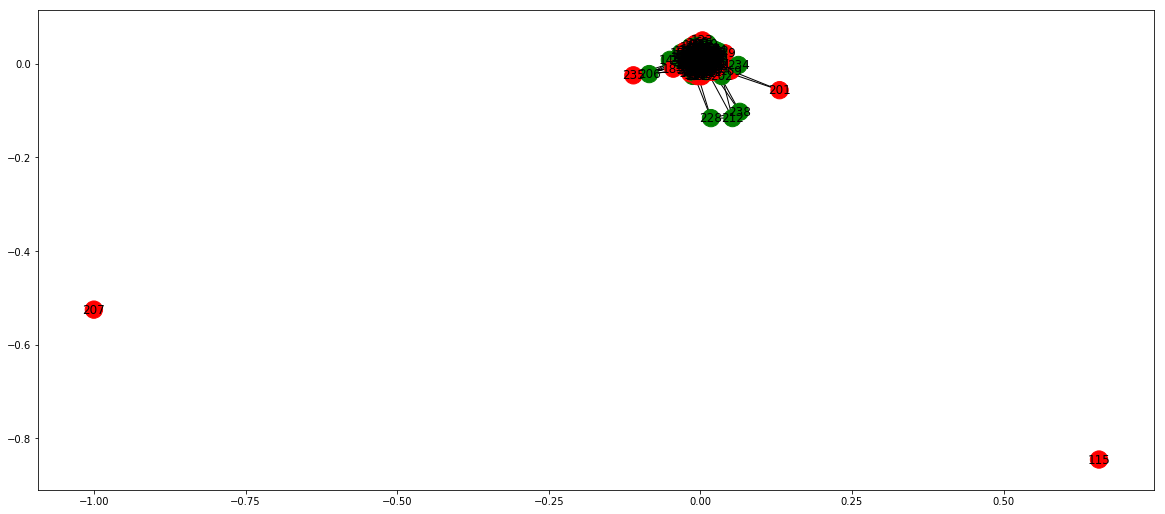

In [402]:
#GRAPH POSITIVES (GREEN) AND NEGATIVES (RED)

G = nx.Graph() 
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_positives)) 
G.add_edges_from(get_edges(adj_matrix_positives)) 

G.add_nodes_from(get_nodes(adj_matrix_negatives)) 
G.add_edges_from(get_edges(adj_matrix_negatives)) 

colors = ['g','r']

plt.subplot(311) 
nx.draw_networkx(G,node_color=colors)

#AS IS POSSIBLE TO SEE BELOW, IT WAS NOT FOUND EXPRESSIVE DIFERENCES AMONG POSITIVE AND NEGATIVE GROUP FOR THE CONSIDERED VARIABLES
